In [1]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

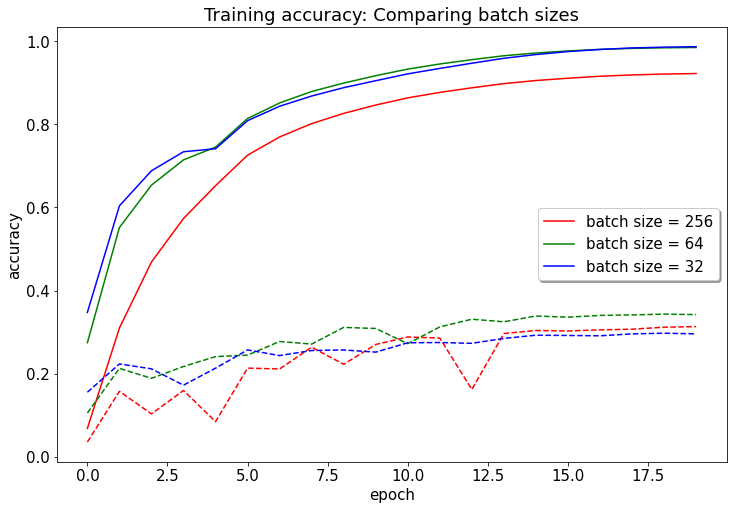

In [19]:
eval.plotting.accuracy_noloss(title="Training accuracy: Comparing batch sizes", index1='917', label_1='batch size = 256', index2='918', label_2='batch size = 64', index3='925', label_3='batch size = 32')

In [7]:
acc925.iloc[-1]

loss       0.2612
acc        0.9869
val_acc    0.2960
Name: 19, dtype: float64

In [2]:
acc917 = pd.read_csv('accuracy/917.csv')
acc918 = pd.read_csv('accuracy/918.csv')
acc925 = pd.read_csv('accuracy/925.csv')

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("batch 64 vs batch 256")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc917['loss'], 'g-', label = 'loss. BS 256')
ax2.plot(acc917['acc'], 'g-', linestyle='dashdot',label = 'acc' )
ax2.plot(acc917['val_acc'], 'g.', linestyle='dashed',label = 'val_acc')

ax.plot(acc918['loss'], 'r-', label = 'loss. BS 64')
ax2.plot(acc918['acc'], 'r-', linestyle='dashdot',label = 'acc' )
ax2.plot(acc918['val_acc'], 'r.', linestyle='dashed',label = 'val_acc')

ax.plot(acc925['loss'], 'y-', label = ' bs 32')
ax2.plot(acc925['acc'], 'y', linestyle='dashdot',label = 'acc' )
ax2.plot(acc925['val_acc'], 'y', linestyle='dashed',label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
# ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')

# ax.plot(acc927['loss'], 'g-', label = 'LR = .02')
# ax2.plot(acc927['acc'], 'g', linestyle='dashdot',label = 'acc' )
# ax2.plot(acc927['val_acc'], 'g', linestyle='dashed',label = 'val_acc')


plt.show()

In [7]:
# res917 

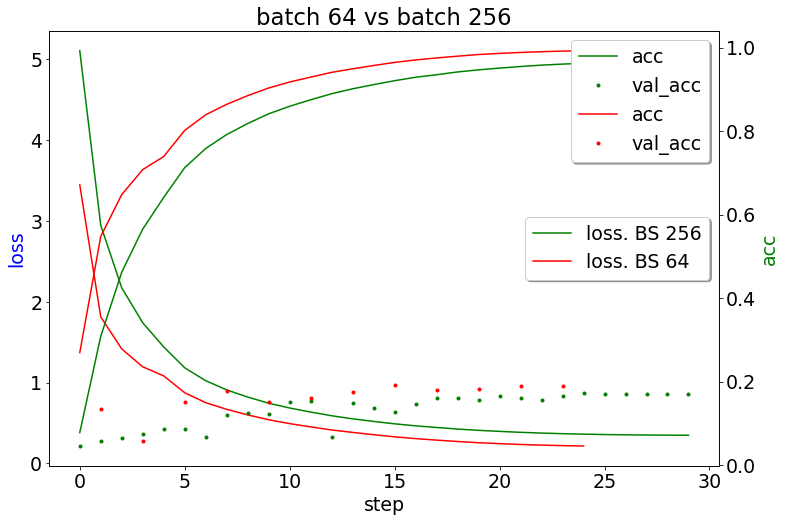

In [8]:
acc813 = pd.read_csv('accuracy/813.csv')
acc910 = pd.read_csv('accuracy/910.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("batch 64 vs batch 256")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc910['loss'], 'g-', label = 'loss. BS 256')
ax2.plot(acc910['acc'], 'g-', label = 'acc' )
ax2.plot(acc910['val_acc'], 'g.', label = 'val_acc')

ax.plot(acc813['loss'], 'r-', label = 'loss. BS 64')
ax2.plot(acc813['acc'], 'r-', label = 'acc' )
ax2.plot(acc813['val_acc'], 'r.', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()

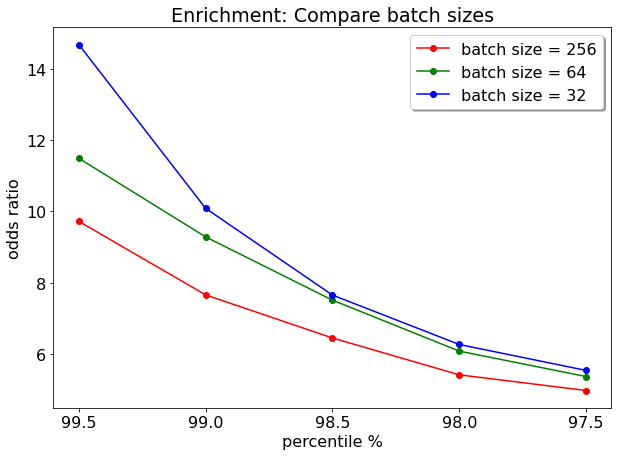

In [9]:
eval.plotting.enrichment('Enrichment: Compare batch sizes',  index1=res1, label_1="batch size = 256", index2=res2, label_2="batch size = 64", index3=res3, label_3="batch size = 32")

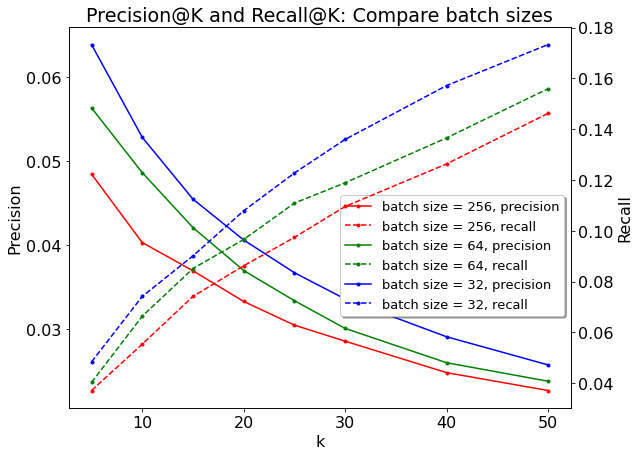

In [12]:
eval.plotting.prec_recall('Precision@K and Recall@K: Compare batch sizes',  fontsize=13, index1=res1, label_1="batch size = 256,", index2=res2, label_2="batch size = 64,", index3=res3, label_3="batch size = 32,")

In [13]:
res1 = pd.read_csv('../runs/917/917_results.csv')
res2 = pd.read_csv('../runs/918/918_results.csv')
res3 = pd.read_csv('../runs/925/results.csv')

In [18]:
res3

,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.409123,14.676753,0.0,5.0,0.063867,0.048358
1,1,0.990,0.326618,10.083987,0.0,10.0,0.052843,0.074143
2,2,0.985,0.277452,7.651627,0.0,15.0,0.045494,0.090122
3,3,0.980,0.242992,6.265665,0.0,20.0,0.040639,0.107867
4,4,0.975,0.216176,5.538400,0.0,25.0,0.036745,0.122739
5,5,0.970,0.195434,5.037830,0.0,30.0,0.033625,0.135961
6,6,0.965,0.178802,4.546358,0.0,40.0,0.029134,0.157175
7,7,0.960,0.164784,4.153719,0.0,50.0,0.025792,0.173305


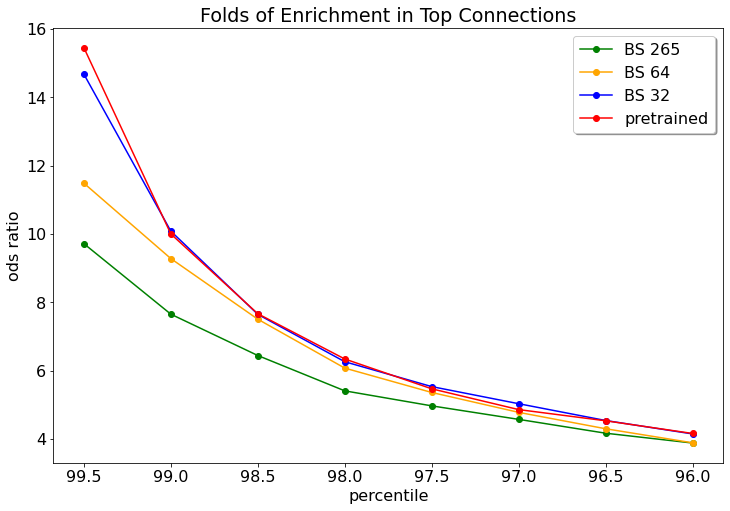

In [14]:
pretrained = pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_enr.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = 'BS 265')
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="orange", label = 'BS 64')
plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="b", label = 'BS 32')
plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

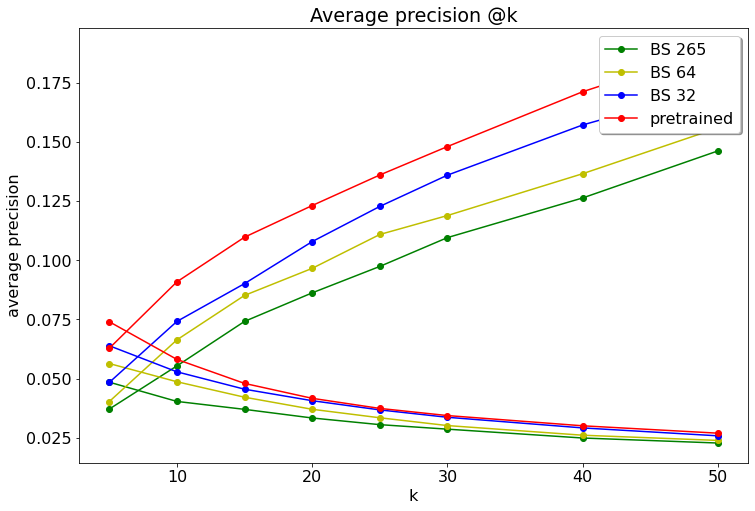

In [15]:
pretrained = pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_pre.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = 'BS 265')
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="y", label = 'BS 64')
plt.plot(res2["k"], res2["recall"], marker="o", color="y")
plt.plot(res3["k"], res3["precision"], marker="o", color="b", label = 'BS 32')
plt.plot(res3["k"], res3["recall"], marker="o", color="b")
plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="red", label = 'pretrained')
plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [15]:
efficientnet_sphered

,k,precision,recall
0,5.0,0.126316,0.002999
1,10.0,0.147368,0.006728
2,15.0,0.129825,0.009290
3,20.0,0.128947,0.012388
4,25.0,0.126316,0.014409
5,30.0,0.124561,0.016816
6,40.0,0.110526,0.020107
7,50.0,0.096842,0.022123


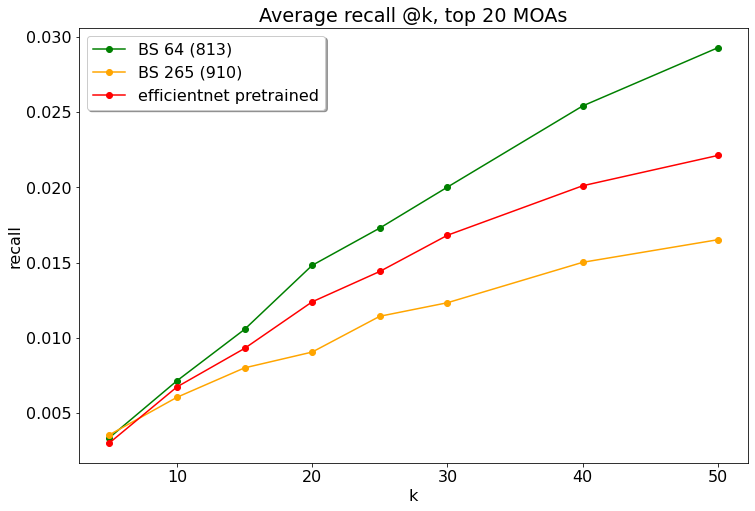

In [16]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(res813["k"], res813["recall"], marker="o", color="green", label = 'BS 64 (813)')
plt.plot(res910["k"], res910["recall"], marker="o", color="orange", label = 'BS 265 (910)')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()